<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/%5BPaper_Review%5DImage_Style_Transfer_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Style Transfer Using Convolutional Neural Networks
[Image Style Transfer Using Convolutional Neural Networks](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)

---


**참고**

https://aigong.tistory.com/359?category=1100247



### 1. Introduction

이상적인 style transfer 알고리즘은 target image로부터 중요한 이미지 content를 뽑아내고 source image의 스타일을 정제하여 texture transfer(한 이미지의 style을 다른 image로 전달하는 것) procedure에 전달할 수 있어야 한다. 

일반적으로 원본 이미지의 style로부터 content를 분리시키는 일은 매우 어려운 문제이지만 Deep Convolutional Neural Network는 이미지의 high-level semantic information을 추출할 수 있기 때문에 style transfer가 가능하다.

이 논문에서는 style transfer를 위한 새로운 알고리즘 "A Neural Algorithm of Artistic Style"에 대해 소개한다. 

### 2.  Deep image representations

**VGG network 기반**
* 16개의 CNN과 5개의 Pooling layer로 구성된 VGG19에서 normalize된 version의 feature map을 활용 
* fully connected layer는 사용하지 않음 (caffee-framework로 짠 코드 참조)
* max pooling 대신 avg pooling이 더 나은 결과를 도출한다는 것을 발견 (optional)

```
import torch
avgpool = nn.AvgPool2d(kernel_size = layer.kernel_size,
                       stride = layer.stride,
                       padding = layer.padding)
```

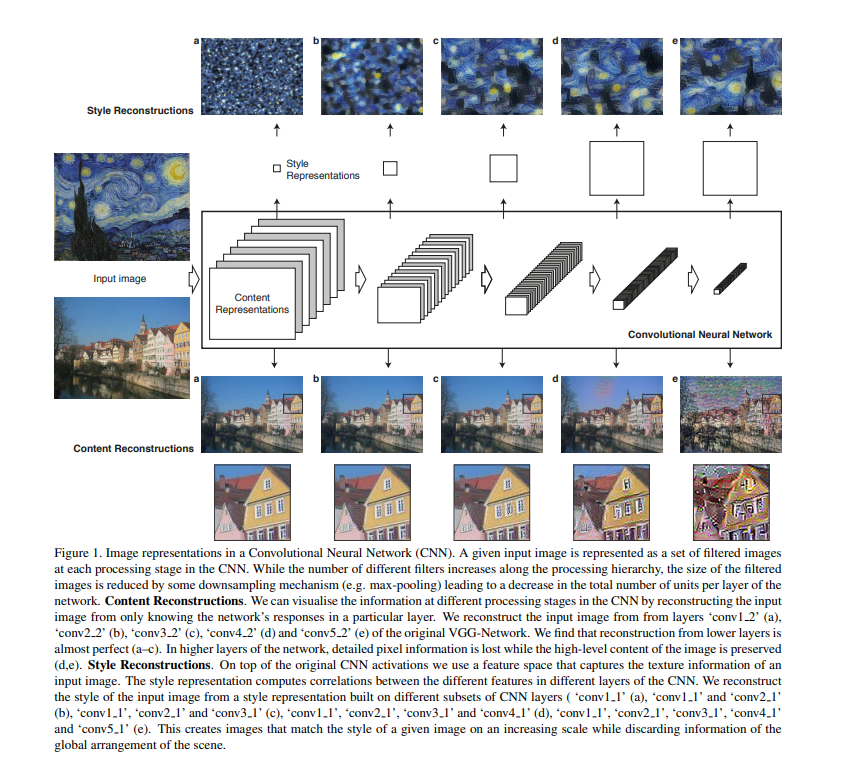

#### 2.1 Content representation
* content image에 대한 학습을 위해 원본 이미지와 생성된 이미지 간 mse loss를 활용 


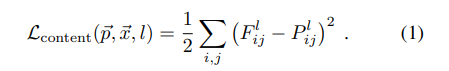

* The derivative of this loss with respect to the activations in
layer l

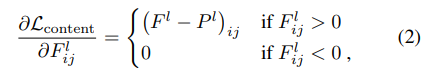

* network의 higher layer (Figure 1. d와 e)는 물체나 정렬에 대한 high-level content를 포착
* network의 lower layer (Figure 1. a-c)는 단순히 원본 이미지의 정확한 픽셀 값을 재생산하는데 초점 
    * 저자들은 higher layer의 feature map을 content representation을 위한 방식으로 활용. 

#### 2.2 Style representation
* input image의 style표현을 획득하기 위해서 Gramm matrix를 활용하여 feature space에서의 정보를 사용



the inner product between the vectorized feature maps i and j in layer l: 

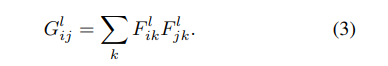

* 원본이미지의 Gram matrices와 생성된 이미지의 Gram matrices 간 mean-squared distance를 최소화하는 방향으로 loss를 구성 

앞에서는 content original image로 p를 사용했다면 여기서 style을 학습하기 위한 style original image로 a를 사용. 당연히 layer l에 대한 feature representation 역시 𝛢ˡ로 표기 

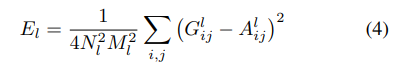

 the total style loss:

 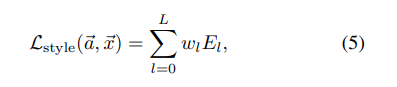

The derivative of E with respect to the activations in layer l can be computed analytically:

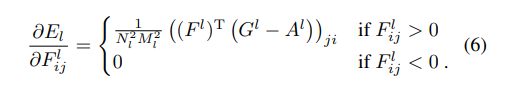

#### 2.3 Style Transfer


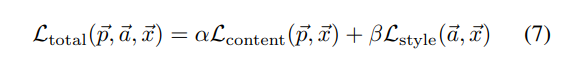

* input image x에 content정보를 가진 p와 style 정보를 가진 a를 합성하기 위한 최종 loss function
* alpha와 beta는 content와 style reconstruction의 weighting factor를 각각 나타냄 
* optimizer로 L-BFGS를 사용 (코드상으로는 Adam으로도 가능)
* style image와 content image의 사이즈는 같게 항상 resize 해준다.

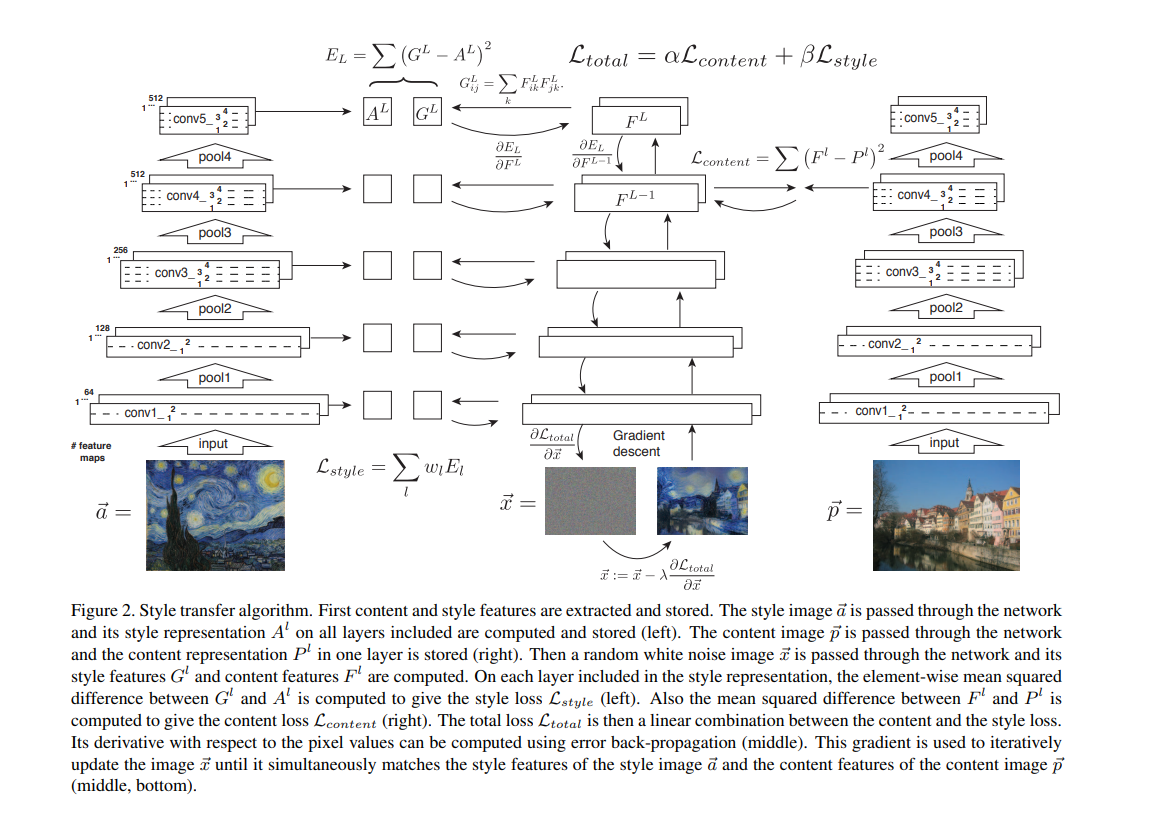

* content image와 style image가 존재하고 생성할 이미지 x는 white noise부터 시작해서 content 정보와 style 정보를 합성하여 얻어낸다. 
* pretrained VGG network를 활용하며 이때 학습은 VGG network가 아니라 input image x가 backprop되면서 점차 변화하는 것을 의미한다.  

### 3. Results

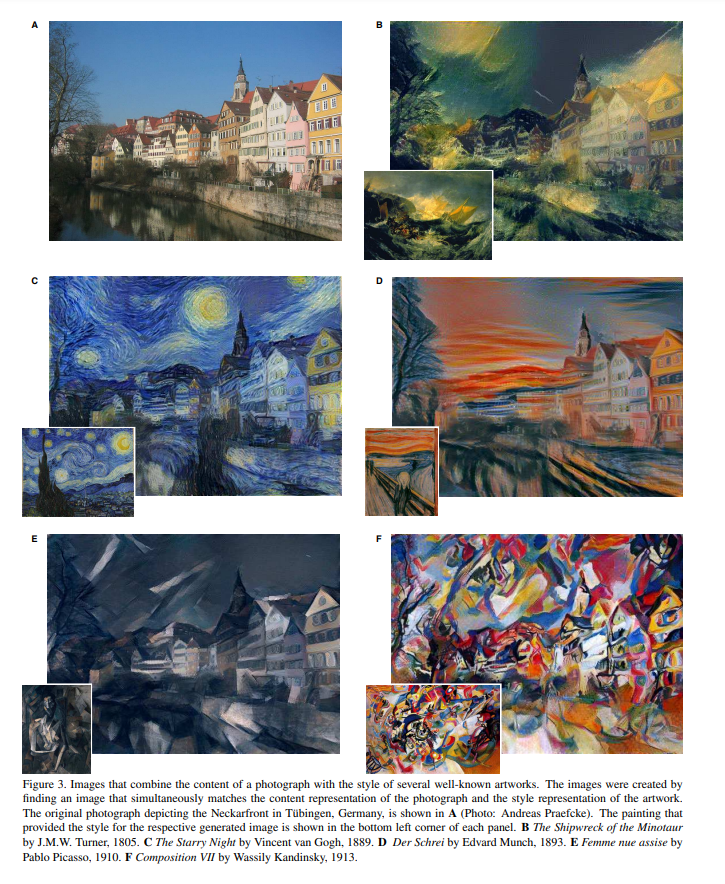

#### 3.1. Trade-off between content and style matching
* style 정보를 강하게 넣고 싶으면 beta 값을 높히거나 alpha 값을 낮히면 된다.
* content 정보를 강하게 넣고 싶으면 beta 값을 낮히거나 alpha 값을 높이면 된다. 
    * 둘은 trade-off관계를 가진다.

#### 3.2. Effect of different layers of the Convolutional Neural Network

conv 2_2와 같은 lower layer는 더 구체적인 pixel 정보를 함유하고 있어 원본 이미지의 구조를 답습하지만 conv4_2와 같은 higher layer는 구조에 대한 큰 제약 없이 style과 잘 섞이도록 하기에 style transfer를 위해서는 higher layer를 활용하는 편이 더 좋다.

#### 3.3. Initialisation of gradient descent

input image의 경우 content image로 부터 시작할 수도 있고 style image로부터도 시작할 수 있다. 
하지만, 위의 경우 style transfer image는 모두 같은 결과를 가지므로 다양한 새로운 이미지를 보고 싶다면 white noise로 시작하는 방법을 권장한다. 

In [ ]:
# https://github.com/leongatys/PytorchNeuralStyleTransfer/blob/master/NeuralStyleTransfer.ipynb